Descriptive Statistics for Key Features:
       Total_Spend  Transaction_Count  Recency  Avg_Satisfaction_Score  \
count       993.00             993.00   993.00                  993.00   
mean      12542.58               5.04    38.72                    5.53   
std        6393.71               2.19    36.40                    2.78   
min         286.00               1.00     0.00                    1.00   
25%        7777.00               3.00    11.00                    3.00   
50%       11939.00               5.00    28.00                    6.00   
75%       16417.00               6.00    56.00                    8.00   
max       37281.00              13.00   197.00                   10.00   

       Loyalty_Index  
count         993.00  
mean           28.01  
std            19.79  
min             1.00  
25%            12.00  
50%            24.00  
75%            40.00  
max           130.00  


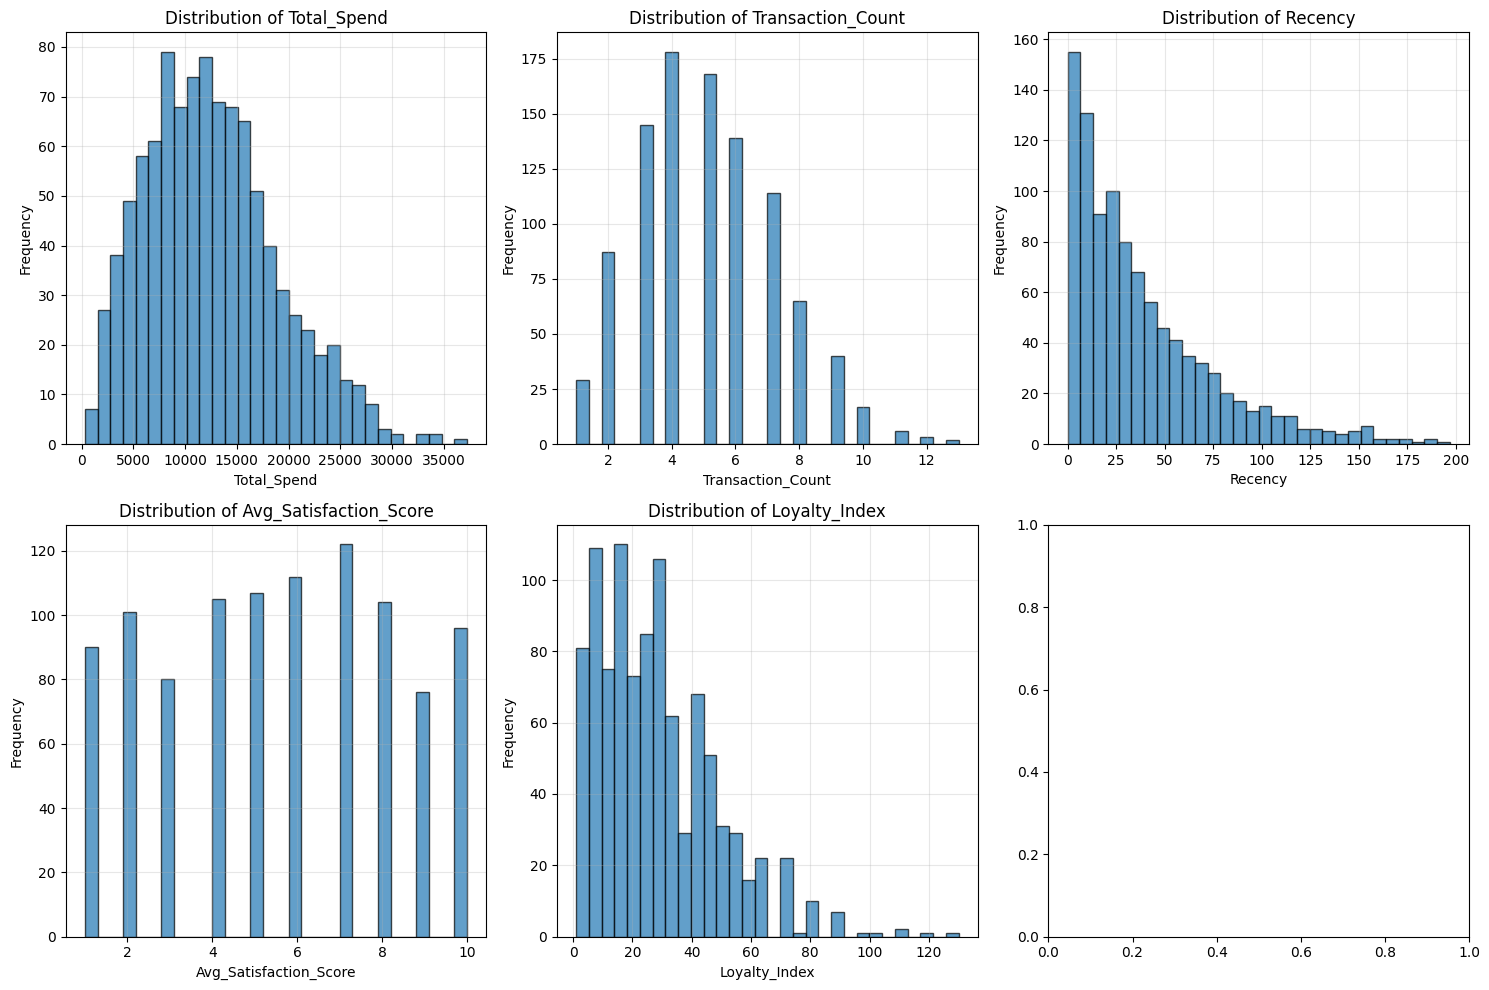

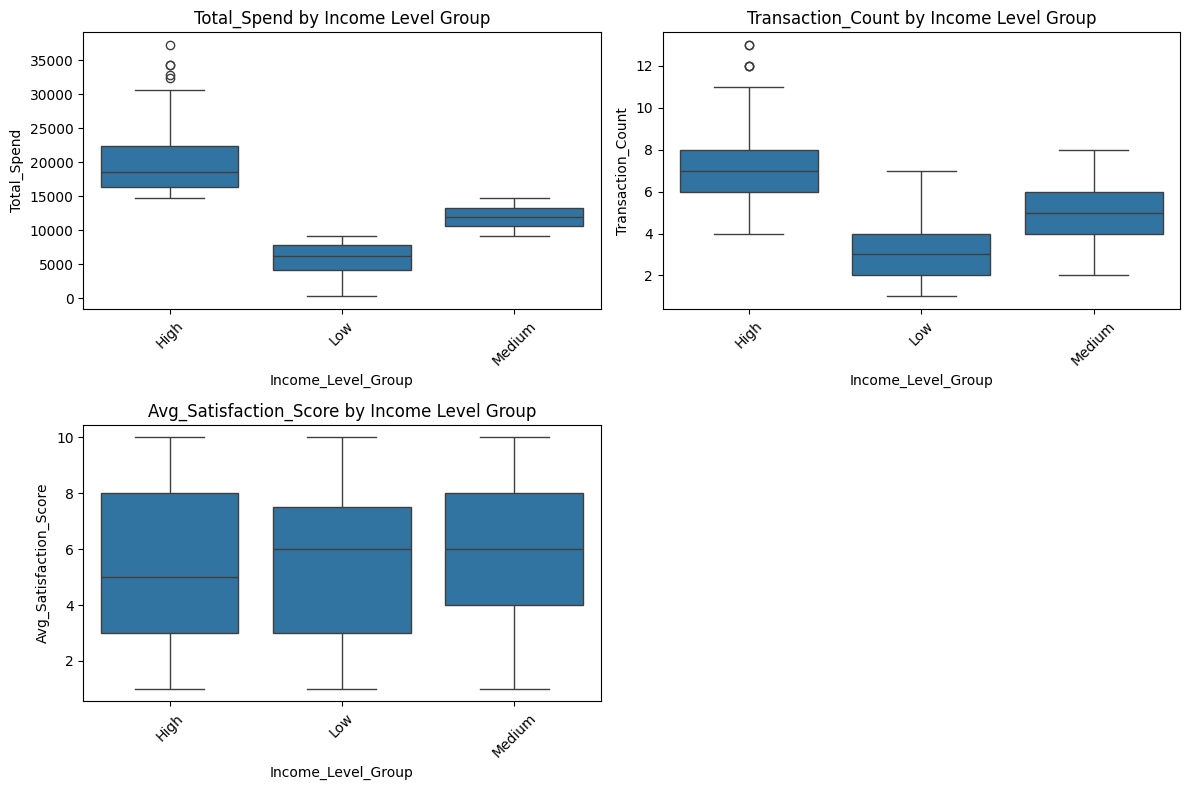

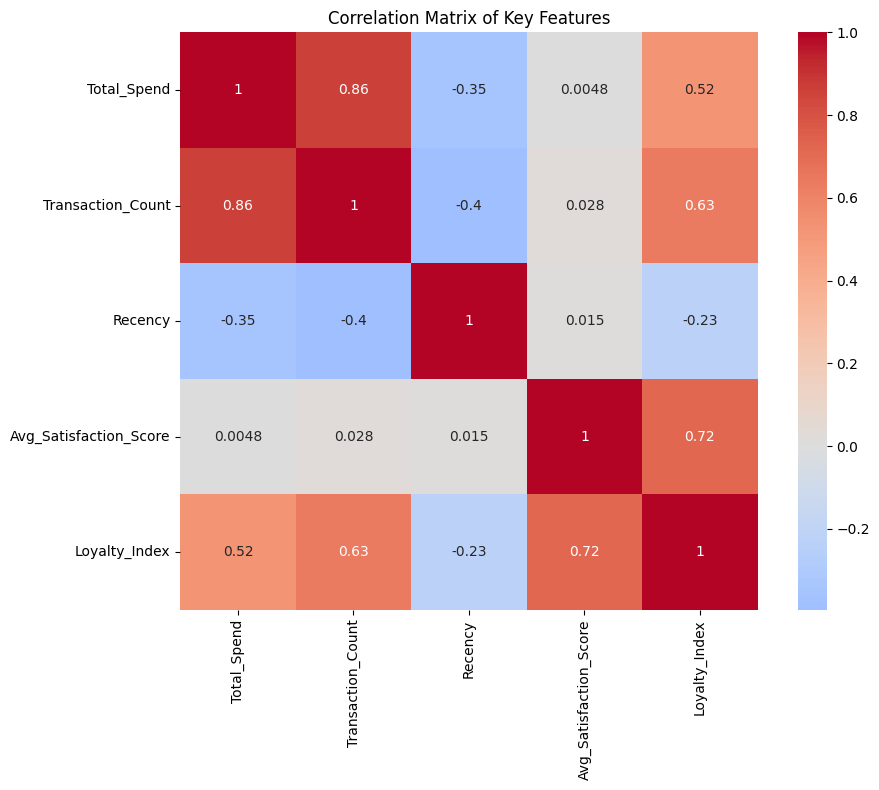

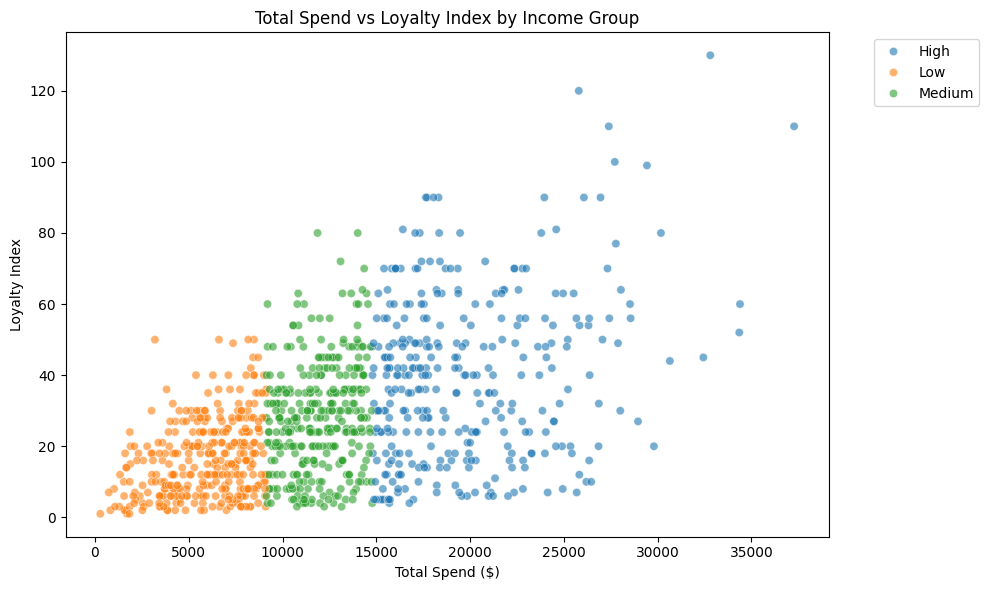


Key Insights from Visualizations:
- Total_Spend: Right-skewed (many low spenders, few high-value customers)
- Transaction_Count: Concentrated around 3-6 txns; indicates casual vs frequent users
- Recency: Bimodal; active (low days) vs lapsed customers
- High-income group shows higher spend/count but similar satisfaction
- Positive correlation between spend/frequency and loyalty


In [1]:
# Cell: Load Engineered Customer Features and compute stats/visuals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the engineered dataset
df = pd.read_csv('Engineered_Customer_Features.csv')

# Select vital numerical features for FinMark segmentation
key_features = ['Total_Spend', 'Transaction_Count', 'Recency', 'Avg_Satisfaction_Score', 'Loyalty_Index']

# 1. Descriptive Statistics Table
stats = df[key_features].describe().round(2)
print("Descriptive Statistics for Key Features:")
print(stats)

# 2. Histograms for distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Boxplots by Income_Level_Group
plt.figure(figsize=(12, 8))
for idx, feature in enumerate(['Total_Spend', 'Transaction_Count', 'Avg_Satisfaction_Score']):
    plt.subplot(2, 2, idx+1)
    sns.boxplot(data=df, x='Income_Level_Group', y=feature)
    plt.title(f'{feature} by Income Level Group')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[key_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.show()

# 5. Scatterplot: Total_Spend vs Loyalty_Index colored by Income_Level_Group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Spend', y='Loyalty_Index', hue='Income_Level_Group', alpha=0.6)
plt.title('Total Spend vs Loyalty Index by Income Group')
plt.xlabel('Total Spend ($)')
plt.ylabel('Loyalty Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print insights summary
print("\nKey Insights from Visualizations:")
print("- Total_Spend: Right-skewed (many low spenders, few high-value customers)")
print("- Transaction_Count: Concentrated around 3-6 txns; indicates casual vs frequent users")
print("- Recency: Bimodal; active (low days) vs lapsed customers")
print("- High-income group shows higher spend/count but similar satisfaction")
print("- Positive correlation between spend/frequency and loyalty")
